MINTSS(Bicriteria- Monotone Cost Submodular Cover problem)

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4490411112062749
0.4495140881243075
0.44988441468496726
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4488628757604379
0.44992798553064794
0.4499619521894628
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.44689311550697675
0.4497292821904024
0.4501491744141076
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4504283209372886
0.4502620958108106
0.4498132866298473
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4501111466710565
0.450222949666243
0.4501386096629413
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.45286720677420633
0.4500205254711656
0.45000217123713276
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4529031267579647
0.4499780676069905
0.4501282572893957
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.45032524372370825
0.4502865678553775
0.45004026686479653
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4496513931969267
0.45042198890997637
0.4501050462477971
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.4489183877204373
0.4506478525110425
0.44995323222574646


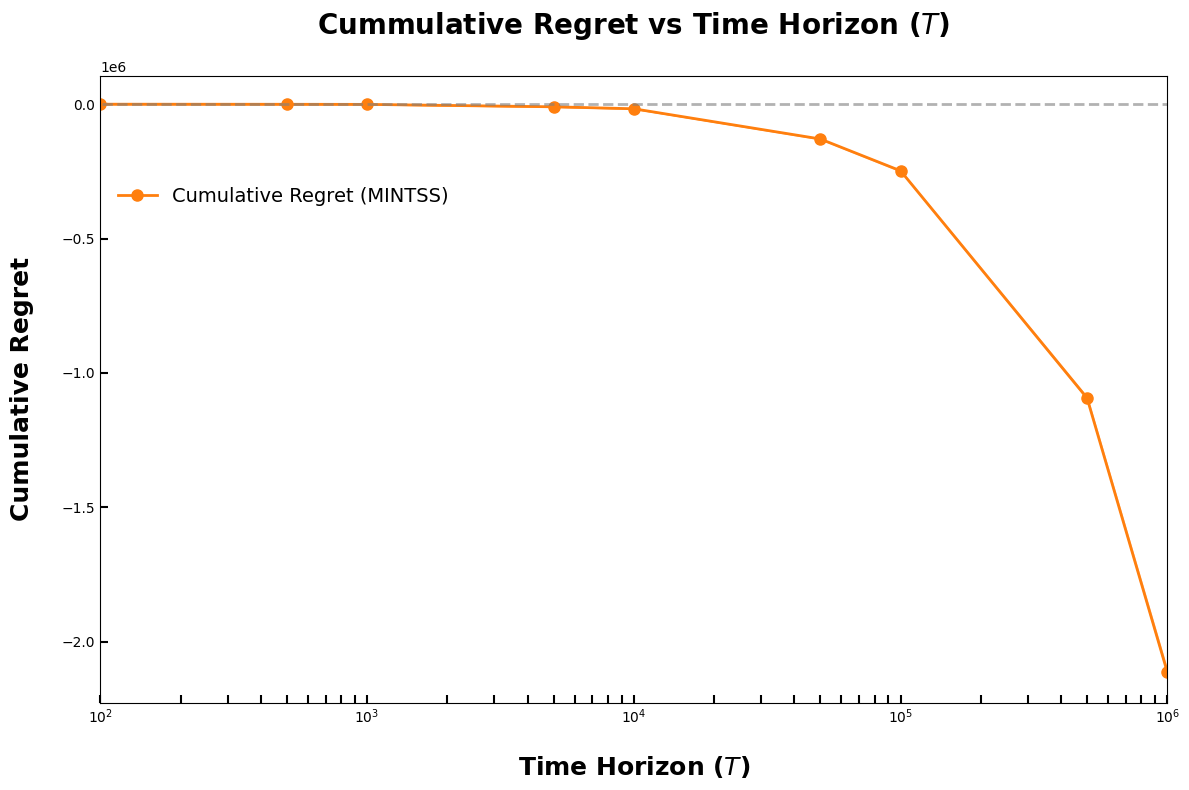

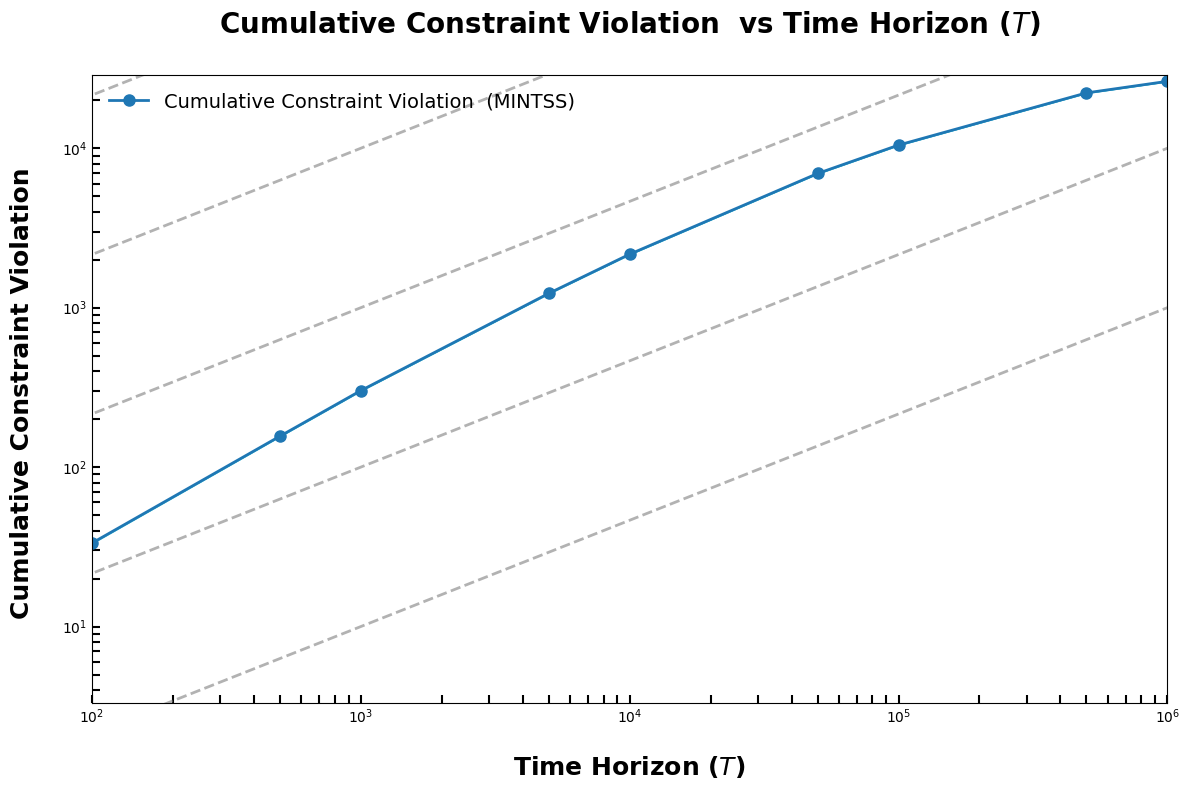

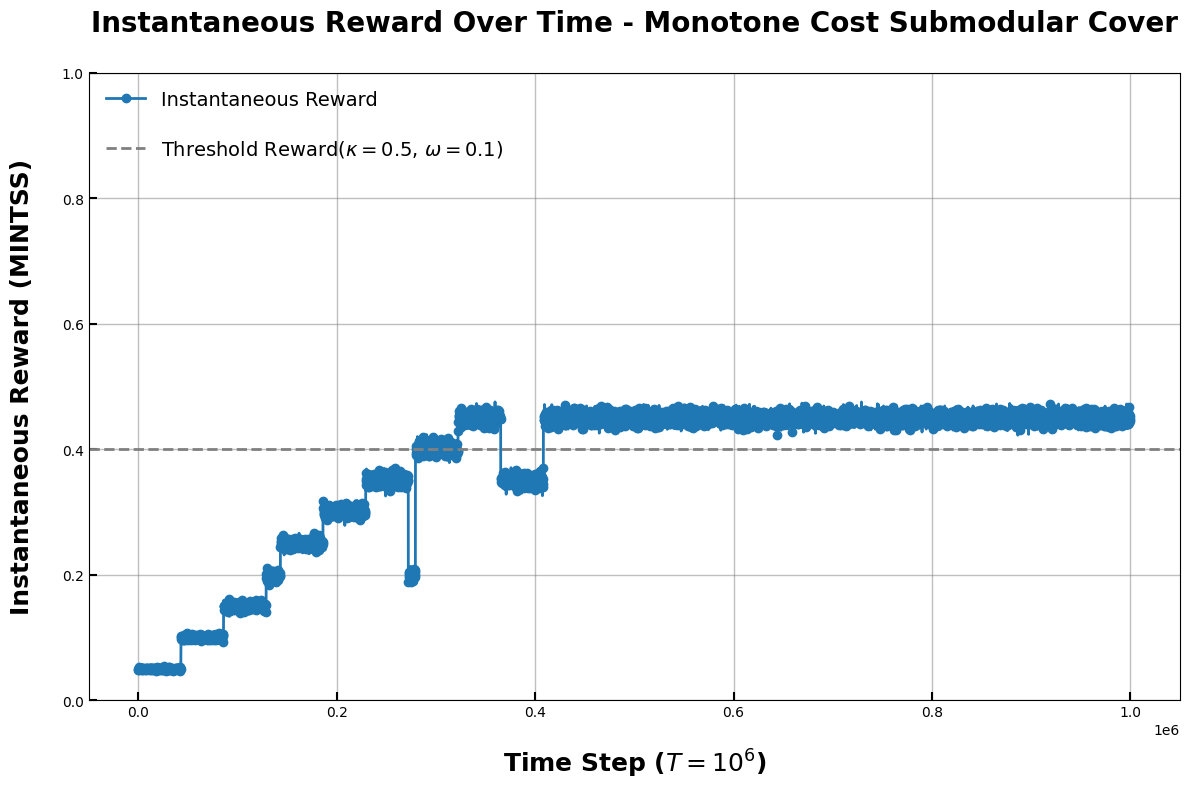

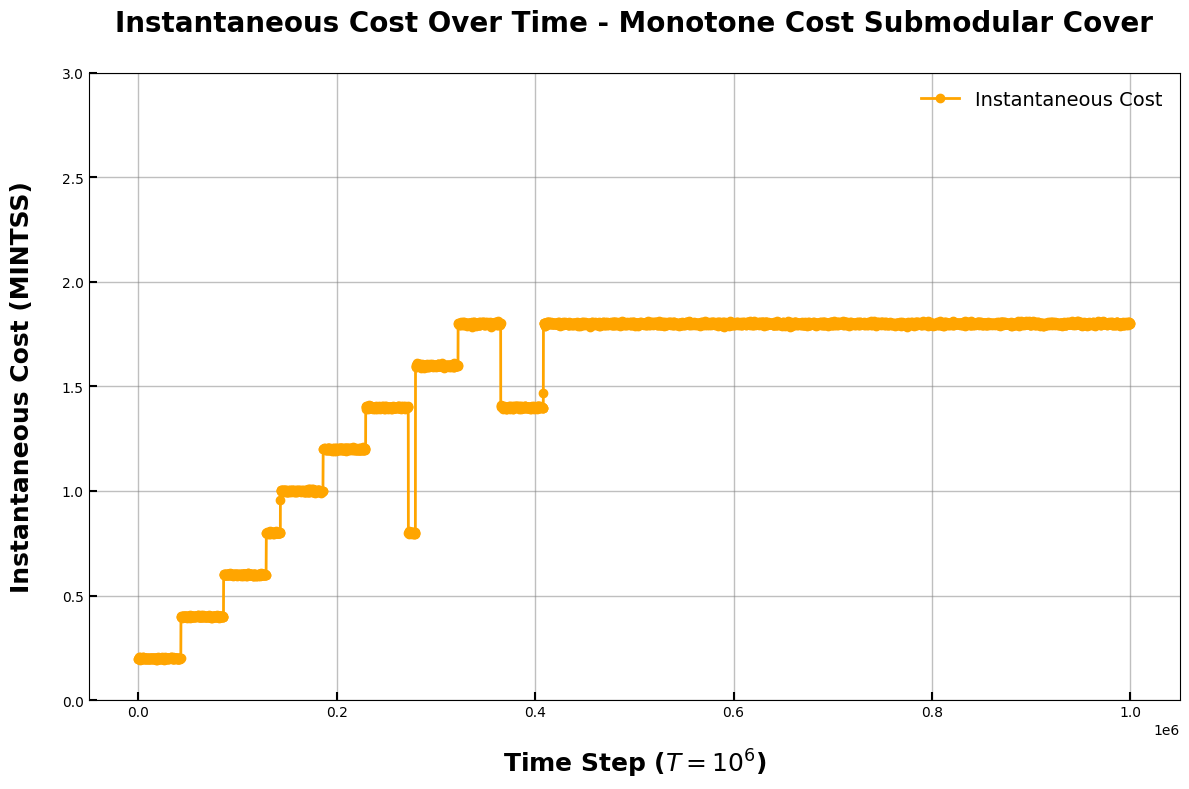

In [3]:
import numpy as np
import random
import math
from random import seed
import heapq

def reward_fn(arm_list):
    n=20
    K=4
    group_size = 6
    def split(list_a, chunk_size):
          for i in range(0, len(list_a), chunk_size):
            yield list_a[i:i + chunk_size]
    groups = list(split(bandit, group_size))
    # print("len(groups)",len(groups),groups)
    #values = [round(x,2) for x in np.linspace(0,0.7,len(groups))]
    values = [round(.1*(val+1),1) for val in range(len(groups))]

    group_ids_arms_list = []
    for i in arm_list:
        for j,group in enumerate(groups):
            if i in group:
                group_ids_arms_list.append(j)
    r = 0
    for i in list(set(group_ids_arms_list)):
        r += values[i] + random.uniform(-values[i], values[i])
        # print("actual",i,r)
    # print("hello",i,r)



    cost_values =  [round(.2*(val+1),1) for val in range(len(groups))]
    group_ids_arms_list = []
    for i in arm_list:
        for j,group in enumerate(groups):
            if i in group:
                group_ids_arms_list.append(j)
    c = 0
    for i in list(set(group_ids_arms_list)):
        c += cost_values[i] + random.uniform(-0.1, 0.1)


    return r/2, c

    # f_max c_max, c_min  (0,.2)  (0.5,1.5)
def split(list_a, chunk_size):
      for i in range(0, len(list_a), chunk_size):
          yield list_a[i:i + chunk_size]
regret_list_final=[]
ccv_regret_list_final=[]
inst_reward_list=[]
inst_cost_list=[]
cost_values = []
# cost_values = [round(random.uniform(0.4, 0.6), 2) for _ in range(20)]
# cost_values = [round(random.uniform(0.4, 0.6), 2) for _ in range(20)]

# cost_values = [1 for _ in range(20)]

# cost_values = [round(random.uniform(0.4, 0.6), 2) for _ in range(20)]
cost_values = [round(random.uniform(0.45, 0.5), 2) for _ in range(20)]


for round_1 in range(10):
  regret_list1=[]
  ccv_regret1=[]
  # inst_reward=[]
  for T in [100,500, 1000,5000,10000,50000,100000,500000,1000000] :
  ###################Initialize#####################################################################################################
    # n_runs=1
    # T=1000000
    s=100

    kappa=0.5
    omega=0.1
    #########
    regret = []
    bandit = []
    alpha= 1+math.log(kappa/omega)
    beta=1-omega/kappa
    ccv_regret=[]
  ###########################################################################################
    # seed(s)
    random.seed()
    bandit = [val for val in range(20)]

    group_size = 6

    groups = list(split(bandit, group_size))

    # print(len(groups))

    values = []
    values = [round(.1*(val+1),2) for val in range(len(groups))]

    ########################Randomize with call reward_function#########################################

    N = (len(bandit))**2   #n^2
    n=len(bandit)
    # m = math.ceil(((T*math.sqrt(2*math.log(T)))/(N+2*N*K*math.sqrt(2*math.log(T))))**(2/3))
    # c_max=0.5
    # c_min=0.1
    # f_max=0.8

    # monotone
    # cost : f
    # reward: f
    c_max=0.6
    c_min=0.4
    f_max=0.8   #2/(4)=0.5  (0,0.2)

    delta=(c_max/(omega*c_min))*f_max*(3+6* n)
    m=math.ceil((1/4)*((delta ** (2 / 3)) *(T** (2 / 3)) * (math.log(T)) ** (1 / 3) ) /(2 *(N ** (2 / 3))))
    # print("m",m)

    selected_action_etcg = []
    obs_influences_etcg = []
    #####################################
    obs_influences_cost_etcg=[]
    opt_obs_influences_etcg=[]
    opt_obs_influences_cost_etcg=[]
    ####################################
    accept_set = []
    tbd_set = list(range(len(bandit)))
    # print("tbd_set_len",tbd_set)
    time_step = 0 #time step counter
    best_arm=1000
    # Submodular selection

    current_best_arms=-1
    while(current_best_arms<kappa-omega or current_best_arms==-1):
        # print(best_arm,"--",tbd_set)
        tbd_set_rewards = [0] * len(tbd_set)
        tbd_set_rewards_gain= [0] * len(tbd_set)

        tbd_set_cost = [0] * len(tbd_set)


        for i in range(len(tbd_set)):
            for count in range(m):
                if time_step >T:
                  break
                # Calculate reward when adding arm i to the current set of selected arms
                if not accept_set:
                    reward_chosen_arms,cost_chosen_arms = reward_fn(accept_set + [tbd_set[i]])
                    reward_gain= min(reward_chosen_arms,kappa)/cost_values[tbd_set[i]]

                else:
                    reward_previous_chosen_arms, cost_previous_chosen_arms= reward_fn(accept_set)
                    reward_chosen_arms,cost_chosen_arms = reward_fn(accept_set + [tbd_set[i]])
                    reward_gain= (min(reward_chosen_arms,kappa)-reward_previous_chosen_arms)/cost_values[tbd_set[i]]


                chosen_arms = accept_set + [tbd_set[i]]
                tbd_set_rewards[i] += reward_chosen_arms
                tbd_set_rewards_gain[i] += reward_gain



                selected_action_etcg.append(chosen_arms)
                obs_influences_etcg.append(reward_chosen_arms)
    ###############################################################333
                tbd_set_cost[i] += cost_chosen_arms
                obs_influences_cost_etcg.append(cost_chosen_arms)
    #####################################################################3
                time_step += 1


            # print("selected_action_etcg",selected_action_etcg)
            tbd_set_rewards[i] = tbd_set_rewards[i] / m  # Average over the m trials  (multiply cost of elemwent)
            tbd_set_rewards_gain[i] = tbd_set_rewards_gain[i]/m
    ###############################################################################
            tbd_set_cost[i]= tbd_set_cost[i]/m

            for count in range(m):
                  opt_obs_influences_etcg.append(tbd_set_rewards[i])
                  opt_obs_influences_cost_etcg.append(tbd_set_cost[i])
    ###############################################################################
            if time_step >T:
              break;
            # tbd_set_rewards_marginal_contri[i] = tbd_set_rewards[i] / m
        # Now check the condition: Only accept the arm if its new reward is less than kappa

        max_gain_acc_reward = np.max(tbd_set_rewards_gain)


        new_accept_index = np.random.choice(np.where(tbd_set_rewards_gain == max_gain_acc_reward)[0])
        best_arm = tbd_set[new_accept_index]
        # print("best_arm",best_arm)

        current_best_arms=tbd_set_rewards[new_accept_index]
        # current_best_arms=tbd_set_rewards[new_accept_index]


        accept_set.append(best_arm)
        tbd_set.remove(best_arm)
            # print(tbd_set,"print(tbd_set)")
        # print("gain-best_arm-index",tbd_set_rewards_gain,best_arm,new_accept_index)

        if time_step >T:
              break;
    # print("accept_set, time_step",accept_set, time_step)

    ##############################3monotone cost
    f_opt=0
    for i in accept_set:
      f_opt+= cost_values[i]

    ##############################



    #######################
    #monotone cost of chosen arms

    #######################
    opt_inf = 0


    #Remaining time
    for t in range(time_step, T):
        # print("out")
        selected_action_etcg.append(accept_set)
        infl,infl_cost = reward_fn(accept_set)
        obs_influences_etcg.append(infl)
    #####################################################
        obs_influences_cost_etcg.append(infl_cost)
    #####################################################
        opt_inf += infl

    ################################################################3
        opt_obs_influences_etcg.append(infl)
        opt_obs_influences_cost_etcg.append(infl_cost)
    #########################################################################33
    print(opt_inf/(T-time_step))
    # Return the set of selected arms
    # print(f"Selected set S: {accept_set}")

    # selected_action_etcg, obs_influences_etcg, obs_influences_etcg_cost

    ############Optimum ############################################################################
    # print("values and cost")
    # print(values,cost)
    # print("selected_set")
    # print(selected_set)
    # opt = np.mean(sorted(values,reverse=True)[:4])

    ccv_opt= beta*kappa
    opt=alpha*f_opt
    # ccv_opt= opt_obs_influences_etcg
    # opt= opt_obs_influences_cost_etcg
    # ccv_opt = np.sum(selected_set)
    # print("opt and ccv_opt")
    # print(opt,ccv_opt)
    ########################################################################################
    n_runs=1
    T_list=[]
    for i in range(T):
      T_list.append(i+1)
    for k in range(n_runs):
        # print("runs",k)
        # print(T)

        # rewards = etcg_with_submodular(bandit, K, T,kappa,omega)[1]
        # selected_action_etcg,rewards,ccv_cost = etcg_with_submodular(bandit, K, T,kappa,omega)
        # regret.append([beta*opt-x for x in obs_influences_etcg])

        # # ccv_cost = etcg_with_submodular(bandit, K, T,kappa,omega)[2]
        # ccv_regret.append([alpha*ccv_opt- y for y in obs_influences_cost_etcg])


        # ccv_regret.append([beta * o - x for o, x in zip(ccv_opt, obs_influences_etcg)])
        # regret.append([alpha * o - x for o, x in zip(opt, obs_influences_cost_etcg)])

        regret.append([ x-opt for x in  obs_influences_cost_etcg])
        ccv_regret.append([ccv_opt - x for x in  obs_influences_etcg])
    # a = np.array(regret)
    # #################################################################################################
    # b = np.array(ccv_regret)

    r_array = np.array(regret)
    c_regret = np.sum(r_array)
    # print("c_regret",c_regret)
    ccv_r_array = np.array(ccv_regret)
    c_ccv_regret = np.sum(ccv_r_array)



    regret_list1.append(c_regret)
    ccv_regret1.append(c_ccv_regret)



  inst_reward_list.append(obs_influences_etcg)
  inst_cost_list.append(obs_influences_cost_etcg)



  # print(regret_list1,ccv_regret1)
  # print("round1",round_1)

  regret_list_final.append(regret_list1)
  ccv_regret_list_final.append(ccv_regret1)


# regret_list_final.to_csv('/content/drive/MyDrive/UAI_2025/weight_cover2/regret_list_final.csv')
# ccv_regret_list_final.to_csv('/content/drive/MyDrive/UAI_2025/weight_cover2/ccv_regret_list_final.csv')
# inst_reward_list.to_csv('/content/drive/MyDrive/UAI_2025/weight_cover2/inst_reward_list.csv')
# inst_cost_list.to_csv('/content/drive/MyDrive/UAI_2025/weight_cover2/inst_reward_list.csv')
# print("opt",opt)
# print("ccv_opt", ccv_opt)
# print("Reward",a)
# print("Cost",b)

####################################################################################################################################################3

################################################################## Plot 1
import matplotlib.pyplot as plt
import numpy as np


cumulative_regret = np.array(regret_list_final)
mean_regret = np.mean(cumulative_regret, axis=0)
std_regret = np.std(cumulative_regret, axis=0)
stderr = std_regret / np.sqrt(cumulative_regret.shape[0])  # Standard error


T_values = np.array([100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000])


fig, ax = plt.subplots(figsize=(12, 8))


ax.plot(T_values, mean_regret, lw=2, label='Cumulative Regret (MINTSS)', marker='o', markersize=8, markevery=1, color='tab:orange')



lower = mean_regret - stderr

upper = mean_regret + stderr
# ax.fill_between(T_values, lower, upper, color='tab:orange', alpha=0.2)

ax.fill_between(T_values, lower, upper, color='tab:orange', alpha=0.5)

# Reference regret curves: c * T^{2/3}
x_ref = np.linspace(1, T_values[-1], 1000)
for c in [ 0]:
    ax.plot(x_ref, c * x_ref**(2/3), '--', alpha=0.6, color='grey', lw=2)


ax.set_xlabel('Time Horizon ($T$)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_ylabel('Cumulative Regret', fontsize=18, fontweight='bold', labelpad=20)
ax.set_title('Cummulative Regret vs Time Horizon ($T$)', fontsize=20, fontweight='bold', pad=30)


ax.set_xscale('log')
# ax.set_yscale('log')

# Ticks and grid
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1.5, colors='black', grid_color='grey', grid_alpha=0.5)
ax.grid(True, which="both", linestyle='', linewidth=0.7, alpha=0.5)

# Legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 0.85), fontsize=14, frameon=False, labelspacing=1.5)

# X limit
ax.set_xlim([T_values[0], T_values[-1]])

# Layout and show
plt.tight_layout()
plt.show()


###############################################  Plot 2


import matplotlib.pyplot as plt
import numpy as np

# Assuming regret and ccv_regret are already defined, we proceed with the code:
cumulative_regret = np.array(ccv_regret_list_final)
mean_regret = np.mean(cumulative_regret, axis=0)
std_regret = np.std(cumulative_regret, axis=0)
stderr = std_regret / np.sqrt(cumulative_regret.shape[0])  # Standard error
import numpy as np
import matplotlib.pyplot as plt

# Assuming `cumulative_regret` holds the actual values for the 5 time points
T_values = np.array([100,500, 1000,5000,10000,50000,100000,500000,1000000])  # Time values we want to plot



# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the cumulative regret with a formal marker style
ax.plot(T_values, mean_regret, lw=2, label='Cumulative Constraint Violation  (MINTSS)', marker='o', markersize=8, markevery=1, color='tab:blue')

lower = np.clip(mean_regret - stderr, 1e-8, None)  # Avoid going below zero
upper = mean_regret + stderr
ax.fill_between(T_values, lower, upper, color='tab:cyan', alpha=0.7)



x_ref = np.linspace(1, T_values[-1], 1000)  # Adjusted to 1000 points
for c in [0.1,1, 10, 100, 1000]:
    ax.plot(x_ref, c * x_ref**(2/3), '--', alpha=0.6, color='grey', lw=2)


ax.set_xlabel('Time Horizon ($T$)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_ylabel('Cumulative Constraint Violation ', fontsize=18, fontweight='bold', labelpad=20)

ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(axis='both', which='both', direction='in', length=6, width=1.5, colors='black', grid_color='grey', grid_alpha=0.5)

ax.grid(True, which="both", linestyle='', linewidth=0.7, alpha=0.5)

ax.set_title('Cumulative Constraint Violation  vs Time Horizon ($T$)', fontsize=20, fontweight='bold', pad=30)
ax.legend(loc='upper left', fontsize=14, frameon=False, labelspacing=1.5)

ax.set_xlim([T_values[0], T_values[-1]])
ax.set_ylim([min(lower)*0.1 , max(upper) * 1.1])

plt.tight_layout()

plt.show()




##########################################3   Plot 3
# Parameters
opt = 0.4  # Threshold line
window_size = 50  # Number of points to average per group

# Downsampling: compute means and std devs over windows
inst_reward_list2 = np.array(inst_reward_list)  # shape (runs, time)
num_points = inst_reward_list2.shape[1]
num_groups = num_points // window_size

inst_reward_downsampled = np.mean(inst_reward_list2[:, :num_groups * window_size].reshape(inst_reward_list2.shape[0], num_groups, window_size), axis=2)
mean_rewards = np.mean(inst_reward_downsampled, axis=0)
std_rewards = np.std(inst_reward_downsampled, axis=0)
err = std_rewards / np.sqrt(inst_reward_list2.shape[0])
time_steps = np.arange(1, num_groups + 1) * window_size

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
label = 'Instantaneous Reward'

# Plot mean with markers
ax.plot(time_steps, mean_rewards, lw=2, label=label, marker='o', markersize=6, markevery=5)

# Plot error band
ax.fill_between(time_steps, mean_rewards - err, mean_rewards + err, alpha=0.2)

# Threshold line
ax.axhline(y=opt, xmin=0, xmax=1, ls='--', lw=2, color='grey',
           label='Threshold Reward($\\kappa=0.5$, $\\omega=0.1$)')

# Labels and title
ax.set_xlabel('Time Step ($T=10^6$)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_ylabel('Instantaneous Reward (MINTSS)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_title('Instantaneous Reward Over Time - Monotone Cost Submodular Cover',
             fontsize=20, fontweight='bold', pad=30)

# Ticks, grid, and formatting
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1.5,
               colors='black', grid_color='grey', grid_alpha=0.5)
ax.grid(True, linestyle='-', linewidth=1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.set_ylim(0, 1)

# Legend
ax.legend(loc='upper left', fontsize=14, frameon=False,
          title='', title_fontsize=16, labelspacing=1.5)

plt.tight_layout()
plt.show()


##################### #############################  Plot 4



import numpy as np
import matplotlib.pyplot as plt

# Parameters
opt = 0.4  # Threshold line
window_size = 50  # Number of points to average per group

# Downsampling: compute means and std devs over windows
inst_reward_list2 = np.array(inst_cost_list)  # shape (runs, time)
num_points = inst_reward_list2.shape[1]
num_groups = num_points // window_size

inst_reward_downsampled = np.mean(inst_reward_list2[:, :num_groups * window_size].reshape(inst_reward_list2.shape[0], num_groups, window_size), axis=2)
mean_rewards = np.mean(inst_reward_downsampled, axis=0)
std_rewards = np.std(inst_reward_downsampled, axis=0)
err = std_rewards / np.sqrt(inst_reward_list2.shape[0])
time_steps = np.arange(1, num_groups + 1) * window_size

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
label = 'Instantaneous Cost'

# Plot mean with markers
# ax.plot(time_steps, mean_rewards, lw=2, label=label, marker='o', markersize=6, markevery=5)
ax.plot(time_steps, mean_rewards, color='orange', lw=2, label=label, marker='o', markersize=6, markevery=5)
# Plot error band
ax.fill_between(time_steps, mean_rewards - err, mean_rewards + err, alpha=0.2)

# Threshold line
# ax.axhline(y=opt, xmin=0, xmax=1, ls='--', lw=2, color='grey',
          #  label='Threshold Reward($\\kappa=0.5$, $\\omega=0.1$)')

# Labels and title
ax.set_xlabel('Time Step ($T=10^6$)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_ylabel('Instantaneous Cost (MINTSS)', fontsize=18, fontweight='bold', labelpad=20)
ax.set_title('Instantaneous Cost Over Time - Monotone Cost Submodular Cover',
             fontsize=20, fontweight='bold', pad=30)

# Ticks, grid, and formatting
ax.tick_params(axis='both', which='both', direction='in', length=6, width=1.5,
               colors='black', grid_color='grey', grid_alpha=0.5)
ax.grid(True, linestyle='-', linewidth=1)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.set_ylim(0, 3)

# Legend
ax.legend(loc='upper left', fontsize=14, frameon=False,
          title='', title_fontsize=16, labelspacing=1.5)

plt.tight_layout()
plt.show()




In [4]:
# print(np.array(ccv_regret_list_final),np.array(regret_list_final))
# ccv_regret_list_final
# print(len(regret_list_final),len(ccv_regret_list_final))
# with open('/content/drive/MyDrive/UAI_2025/weight_cover2/inst_reward_list.log', 'w') as f:
#     # Write each list as a line in the file
#     for i, reward_list in enumerate(inst_reward_list):
#         f.write(f"Reward List {i}: {reward_list}\n")